<a href="https://colab.research.google.com/github/mukhammadarifin/PCVK_Genap_2021/blob/main/Minggu_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM FILTER

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa 
menggunakan library atau metode konvolusi dari OpenCV.

2. Berikut merupakan langkah-langkah yang dapat dilakukan:

  - Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan
pada akun github seperti pada modul sebelumnya.

  - Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

  - Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. 
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan 
padding.

  - Load citra yang akan diproses dan ubah menjadi citra keabuan

  - Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening 
sebagai berikut

  - Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image as im

In [10]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)


  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return new_image

In [11]:
img = cv.imread('/content/drive/MyDrive/image/kuciang oren.jpg')
image_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

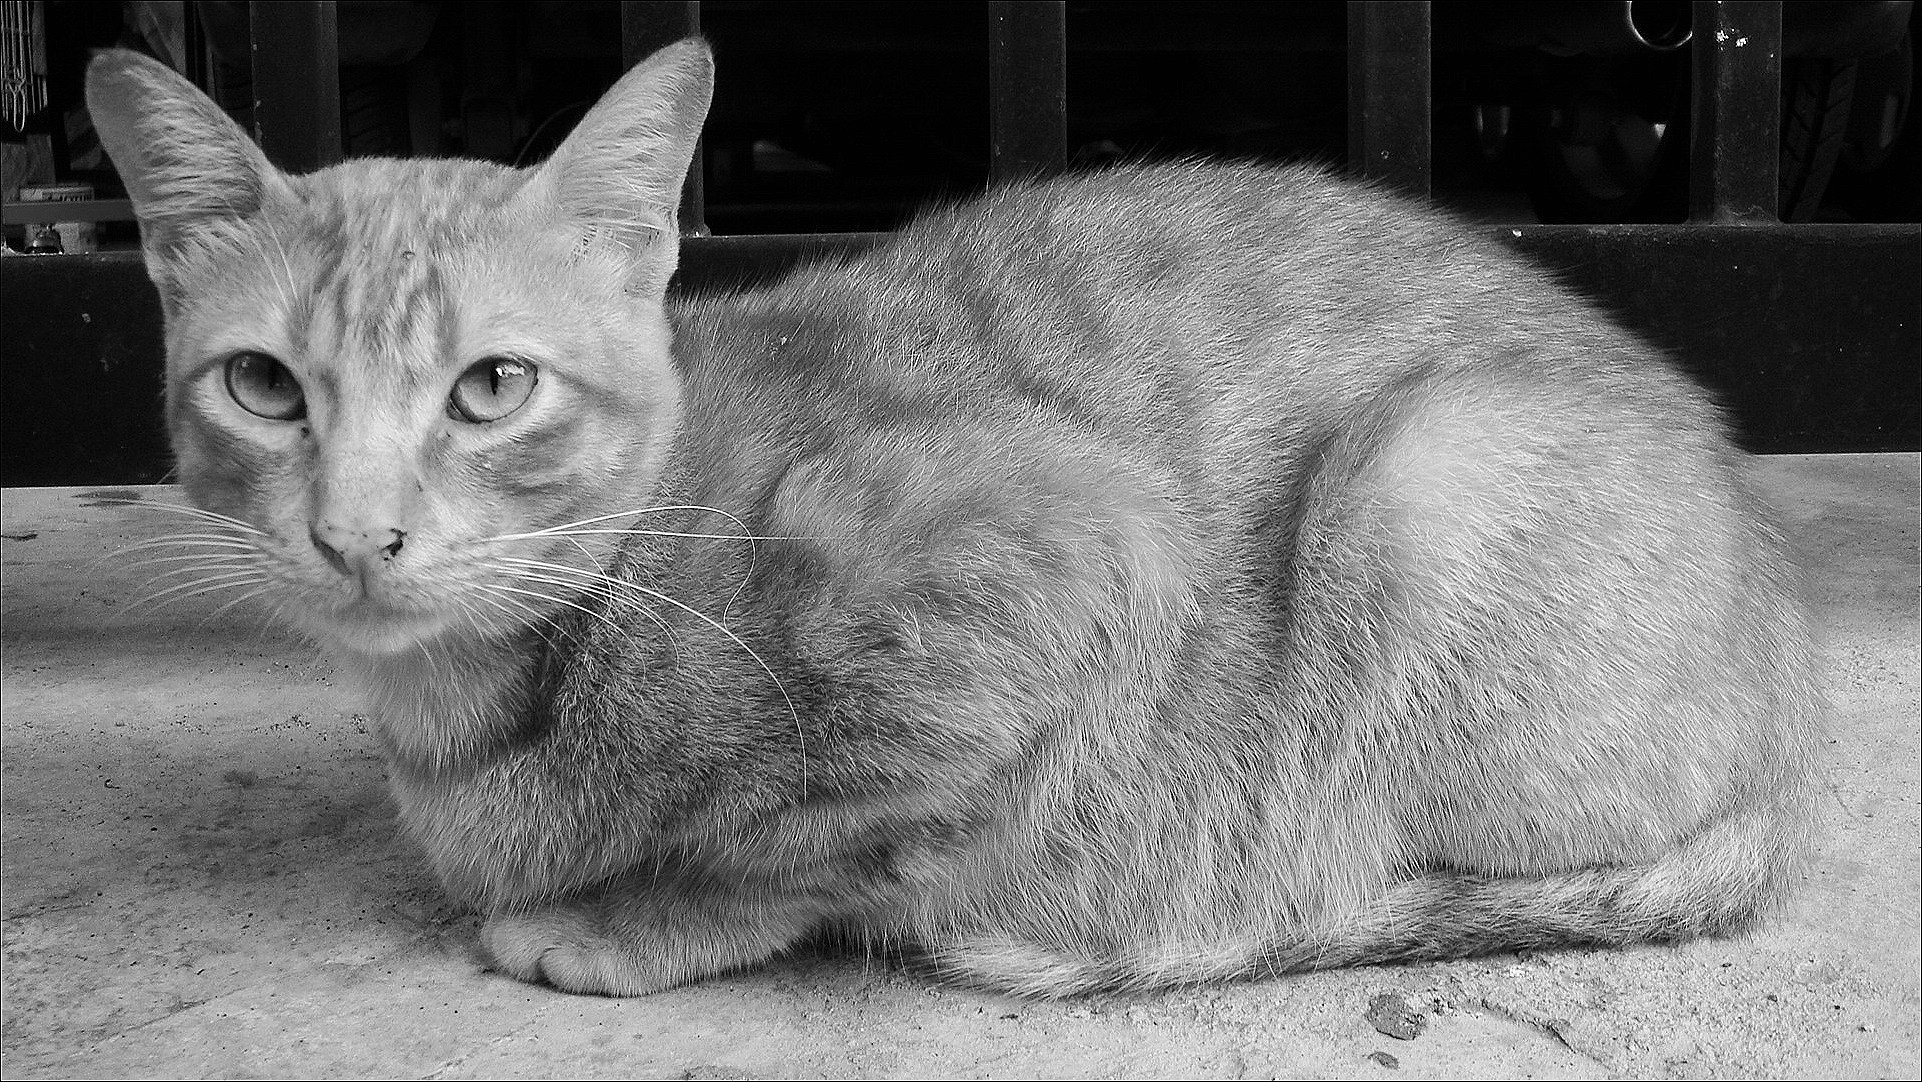

In [13]:
# image sharpen
kernal_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])
# emboss
kernal_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])


# left sobel edge detection
kernal_sobel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])


# canny edge detection
kernal_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])


cv2_imshow(convolution2d(image_gray,kernal_sharpen,1,2))

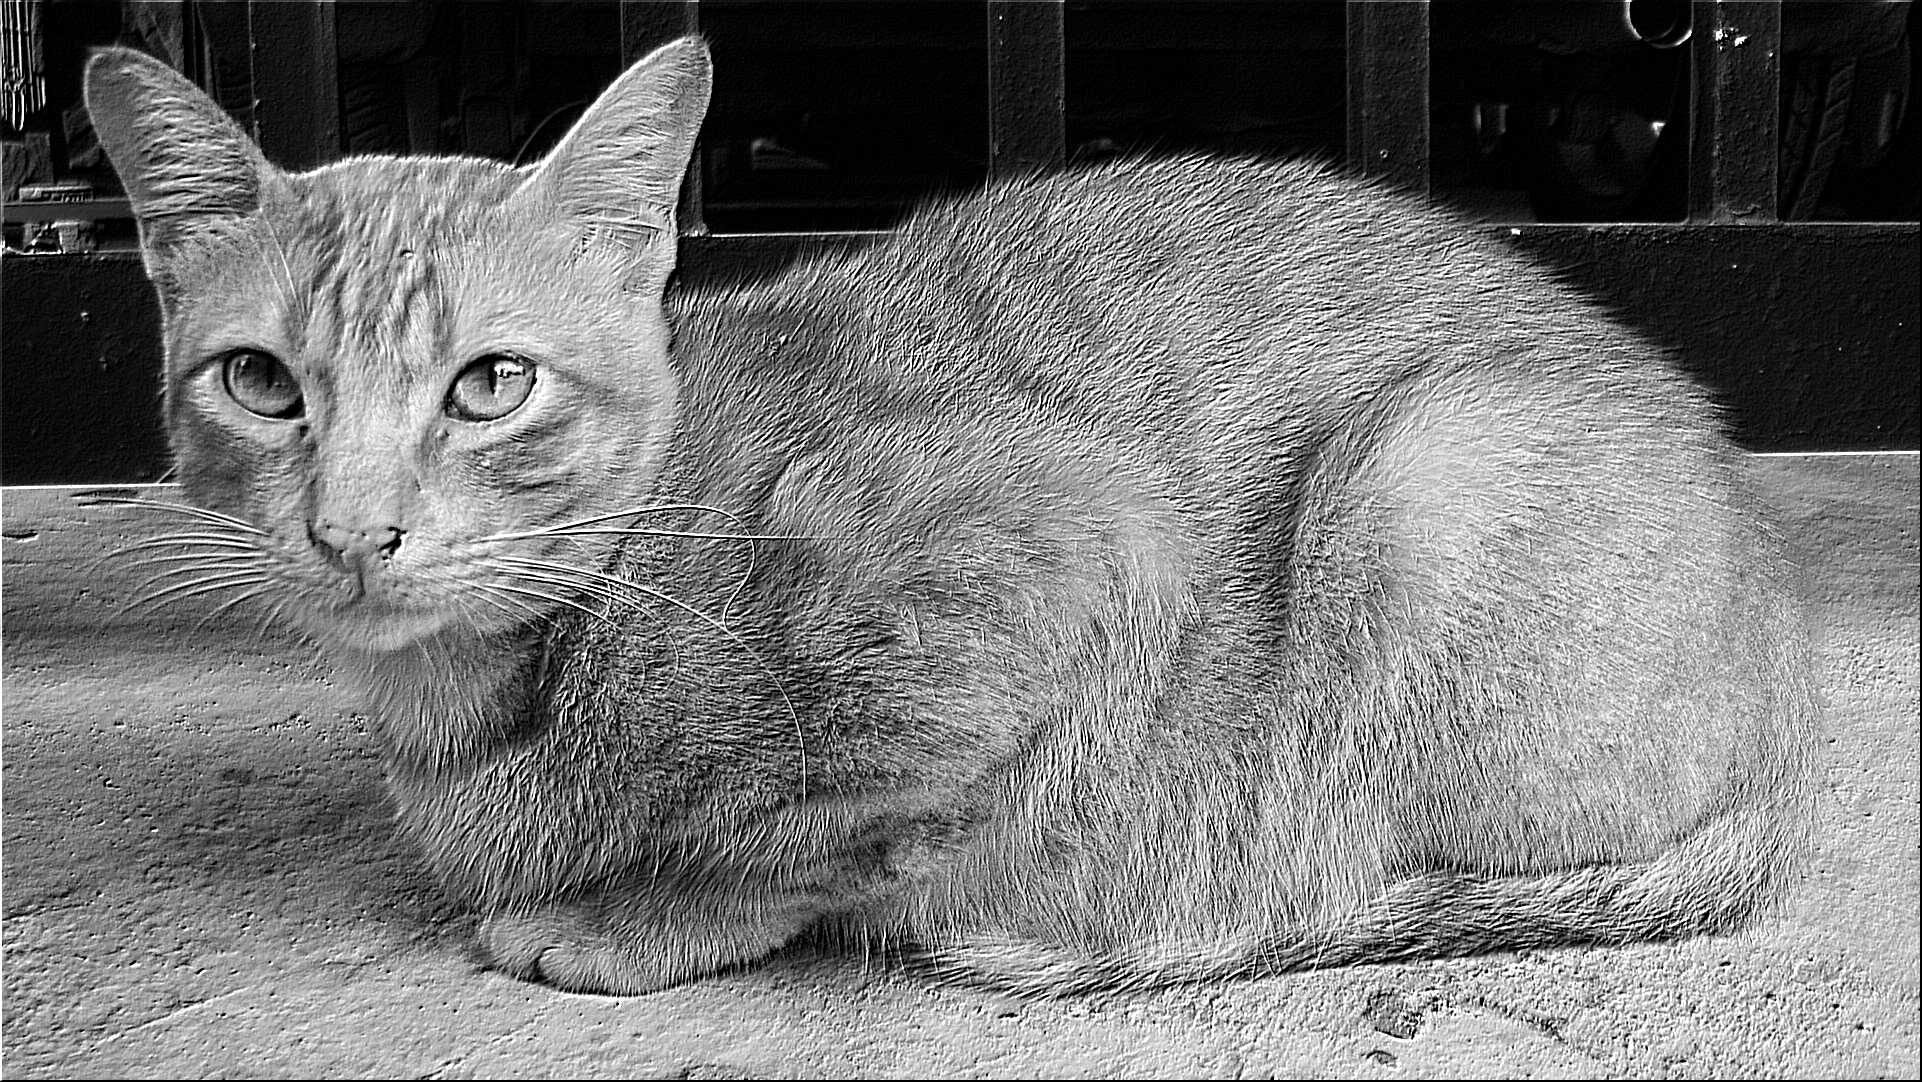

In [15]:
cv2_imshow(convolution2d(image_gray,kernal_emboss,1,2))

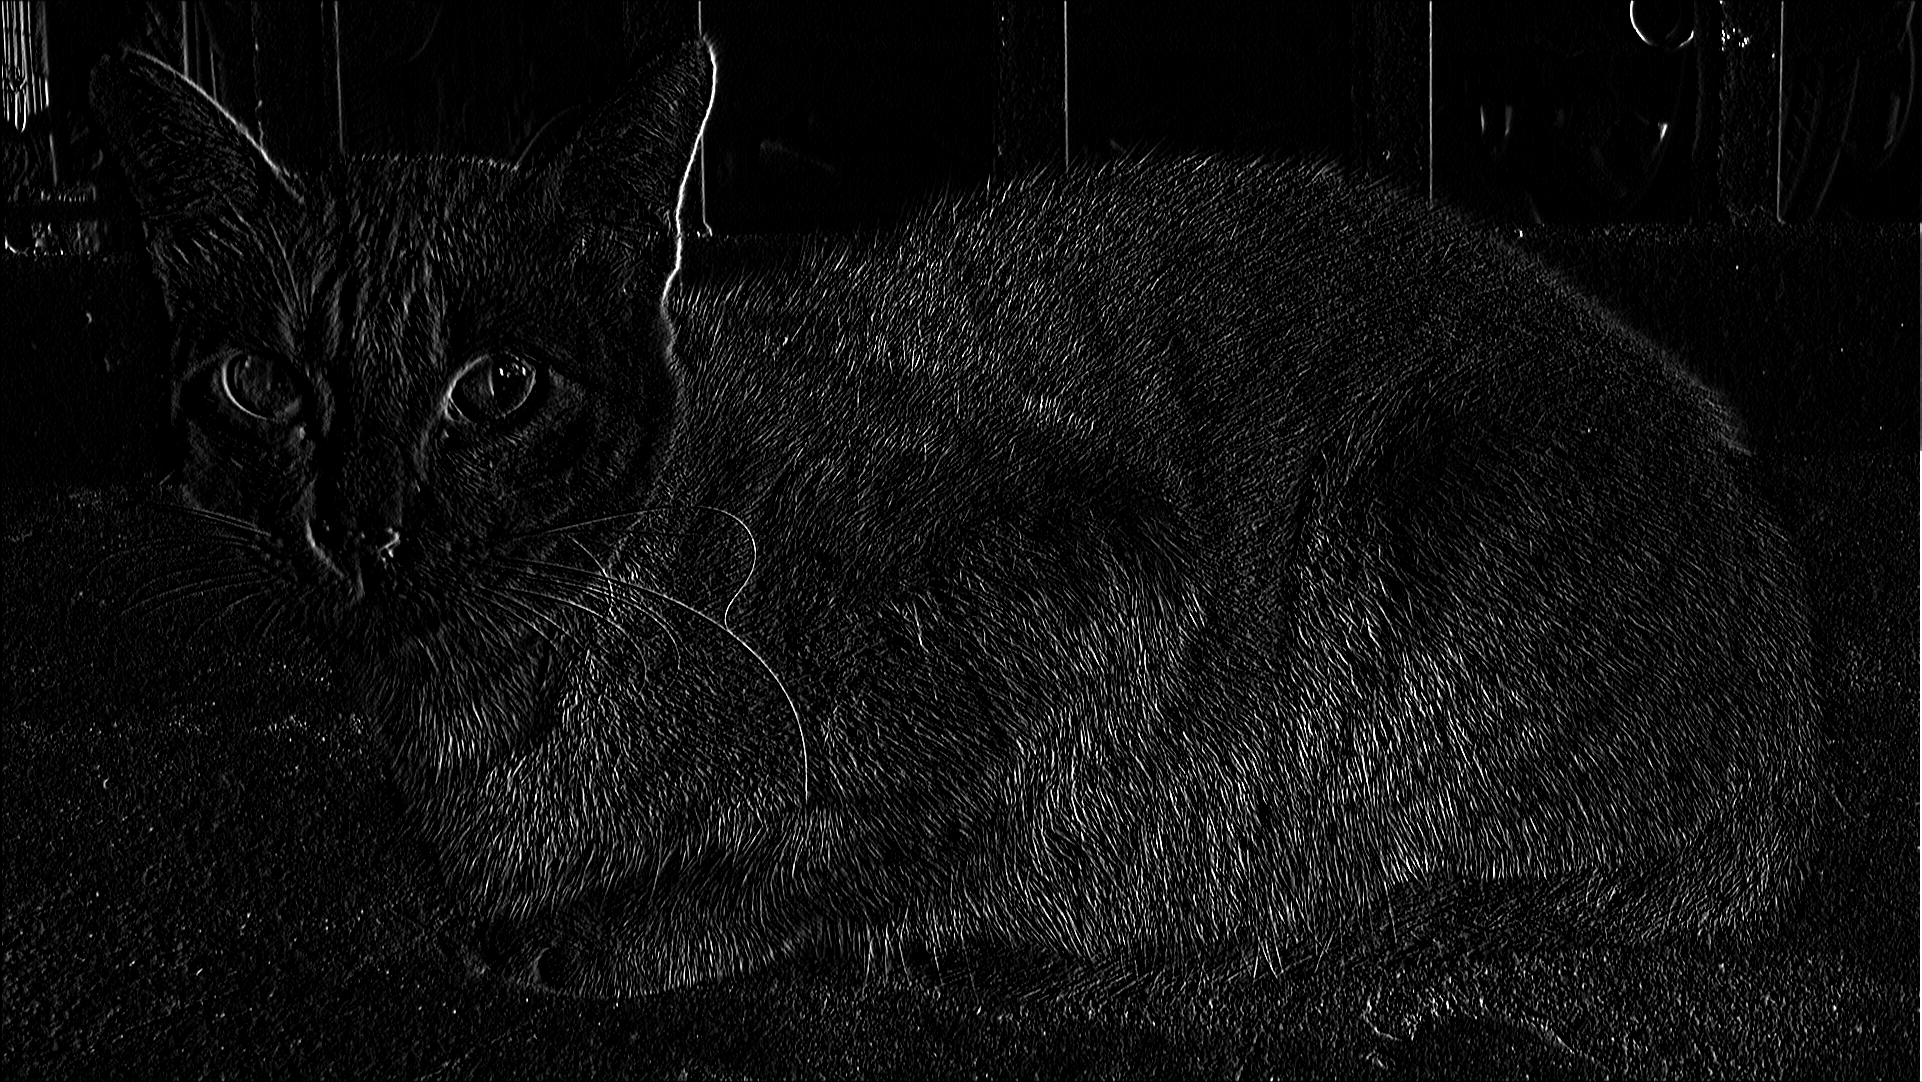

In [16]:
cv2_imshow(convolution2d(image_gray,kernal_sobel,1,2))

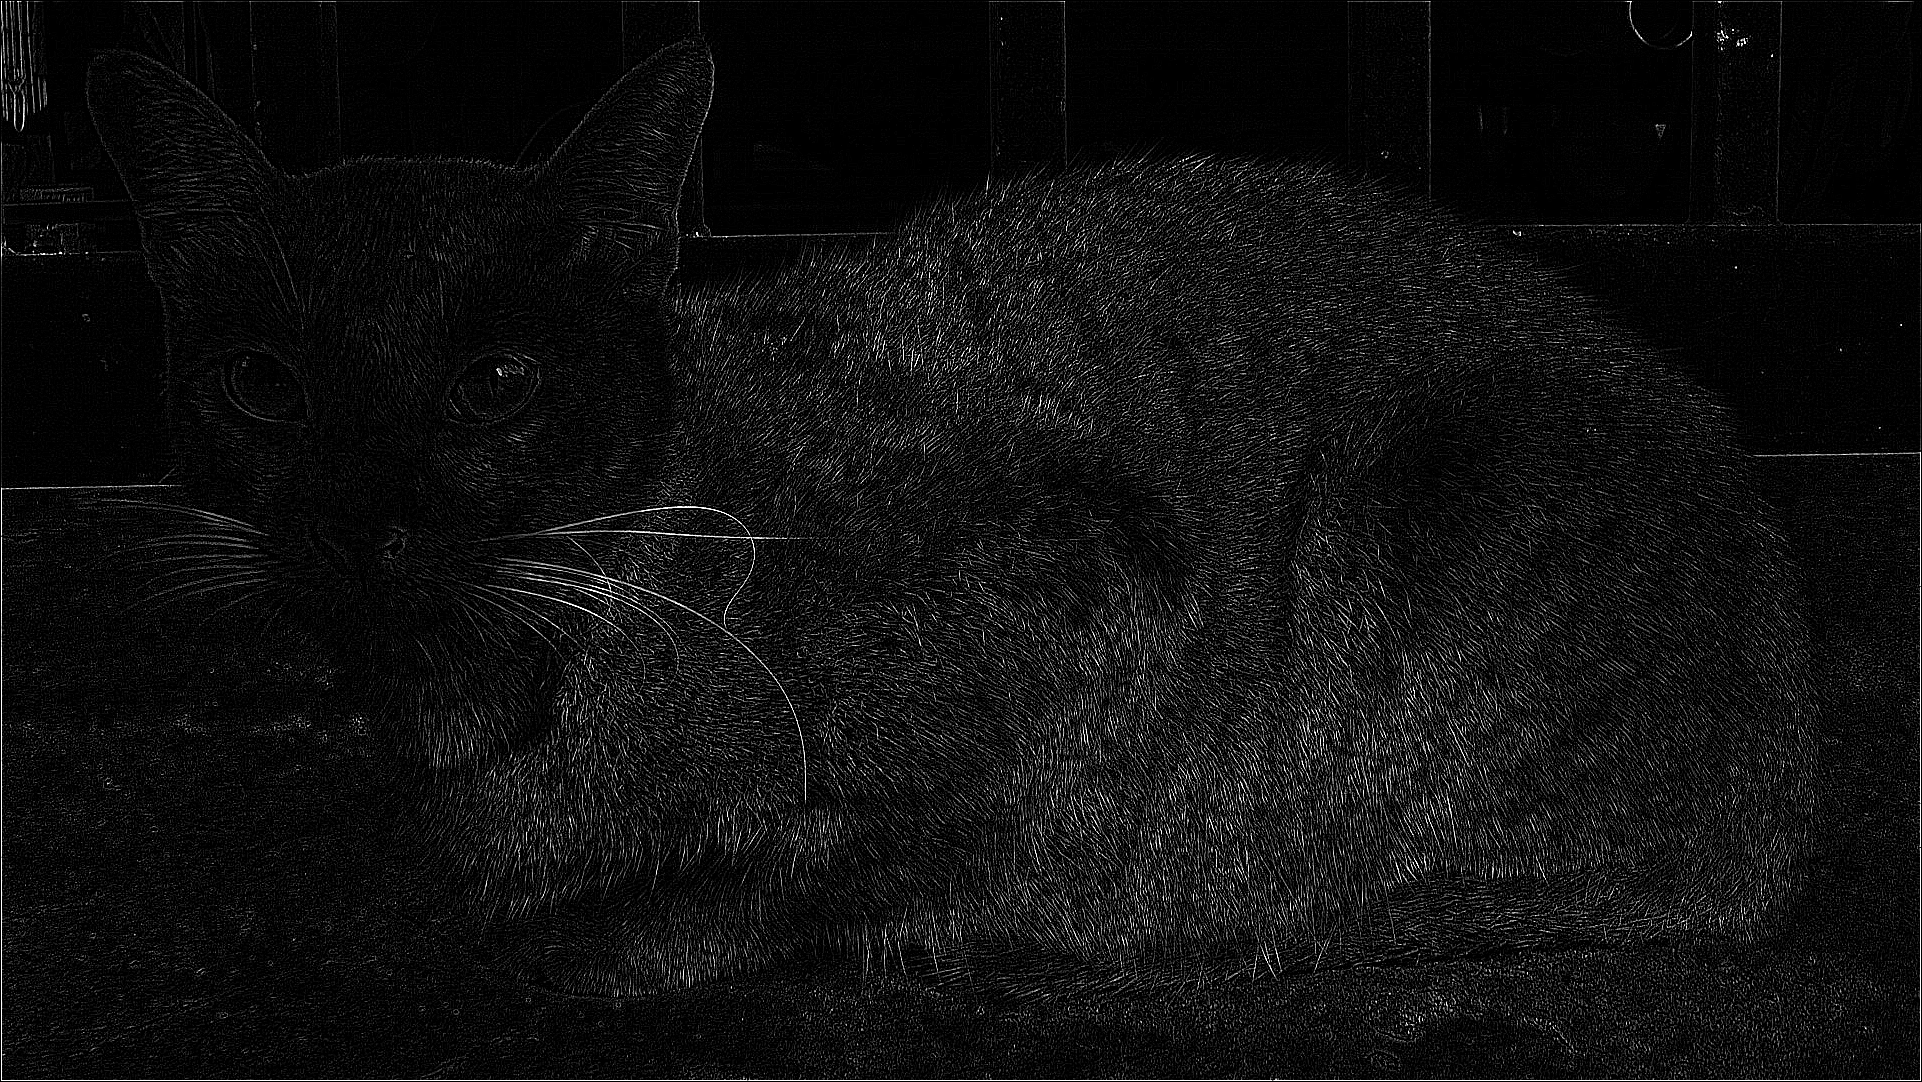

In [17]:
cv2_imshow(convolution2d(image_gray,kernal_canny,1,2))

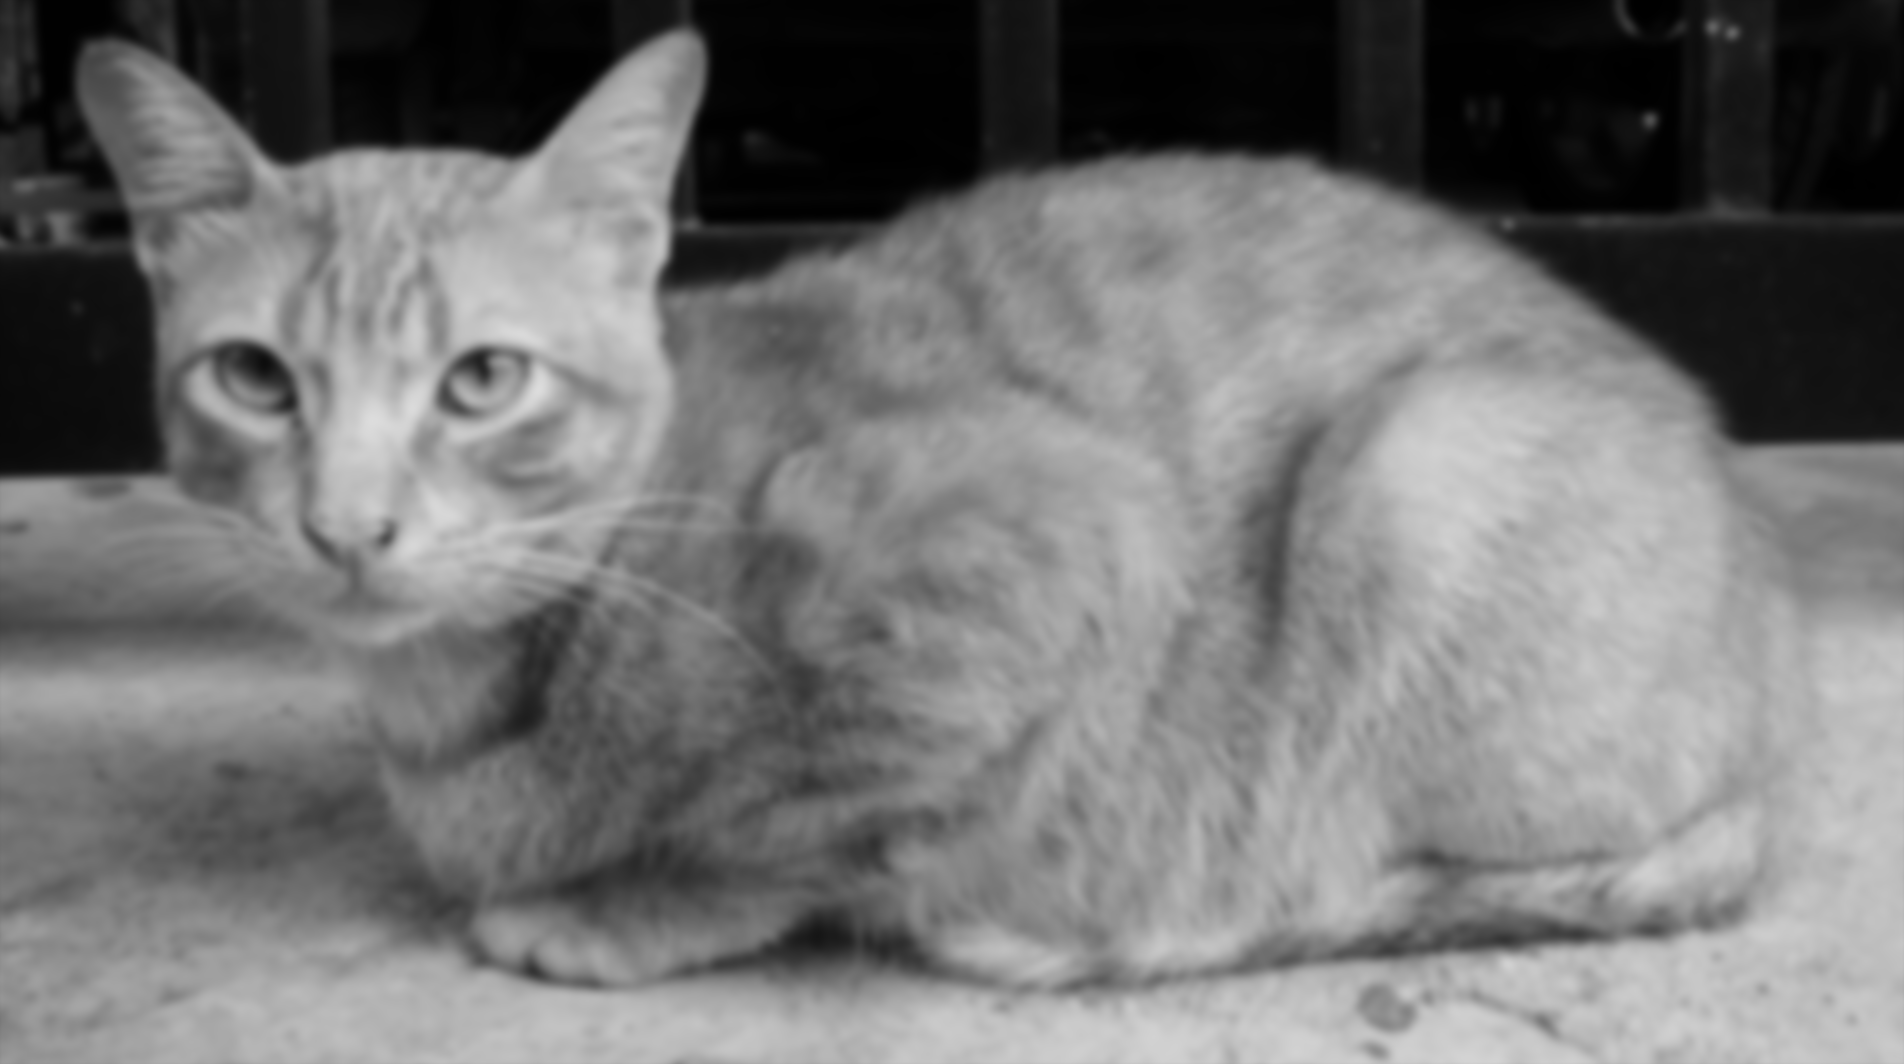

In [19]:
# 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(image_gray,gauss_kernel,1,2))